# Author's notes: 
This notebook is part of a larger project I am currently working on. However, due to a quirk in this particular code, it cannot be contained in one notebook. So I am publishing it separately. 

The code is not particularly unique and follows the information on hugging face (https://huggingface.co/stabilityai/stable-diffusion-2 ). However, there is one change. For torch.cuba to run, the accelerator has been changed to GPU T4x2. I am unsure if there is a work around this but I personally could not get the code to work without this change.  

There is little information about this notebook/on this notebook but I hope when the main project is complete, it will make sense/tie this together. 

In [1]:
# note for this i have changed the accelerator to GPU T4x2. torch (cuba) function doesnt run otherwise

# set enviroment
!pip install --upgrade git+https://github.com/huggingface/diffusers.git transformers accelerate scipy 

# import libraries
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler

import torch
from torch import autocast

#set up pipe to connect and run stable diffusion
model_id = "stabilityai/stable-diffusion-2"

scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, revision="fp16", torch_dtype=torch.float16)
pipe = pipe.to("cuda")




  Cloning https://github.com/huggingface/diffusers.git to /tmp/pip-req-build-iemeu_0f
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers.git /tmp/pip-req-build-iemeu_0f
  Resolved https://github.com/huggingface/diffusers.git to commit daebee0963d2b39fb3fa9532ab271a91674c4070
  Installing build dependencies ... - \ | / - \ done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.5/191.5 kB 14.4 MB/s eta 0:00:00
  Created wheel for diffusers: filename=diffusers-0.10.0.dev0-py3-none-any.whl size=466770 sha256=bef646cb4bf47c4527fda2ae460152e58bd445ad7374d65e8e57b02da1489882
  Stored in directory: /tmp/pip-ephem-wheel-cache-n_t8iu7r/wheels/02/d2/24/9d4a75289c359ffceca56b42aecb8e8fbf659c455bcd4d2eca
Successfully built diffusers
  Attempting uninstall: accelerate

Downloading:   0%|          | 0.00/345 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/511 [00:00<?, ?B/s]

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/624 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/681M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/460 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/815 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/900 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.73G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/602 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/167M [00:00<?, ?B/s]

  0%|          | 0/50 [00:00<?, ?it/s]

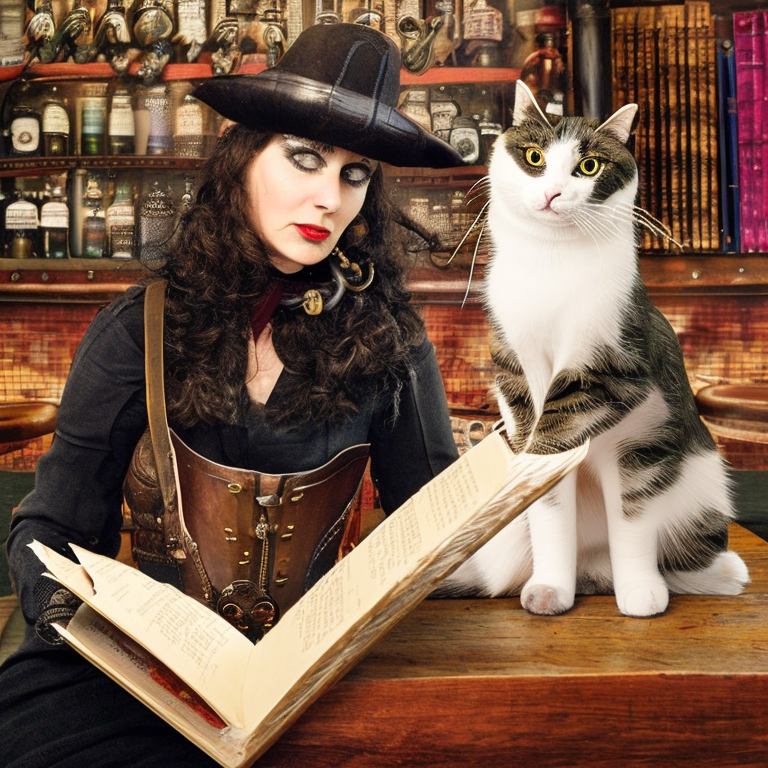

In [2]:
prompt = 'A steampunk woman reading a book with her cat at the bar'

image = pipe(prompt, height=768, width=768).images[0]
image